【251206 直播回放-Transformer及代码实现】https://www.bilibili.com/video/BV1t9mFBAExG?vd_source=8bbe2f742c5dd877b211cbcea8cdc398

解释每一个类,方法,每一行, 并且在transformer 架构图上标注上面类和方法对应位置和功能示意图

### 解释 Transformer 模型中的各个类、方法及其功能

以下是针对您提供的代码中每个类和方法的详细解释，并且会在典型的 Transformer 架构图中标注它们的位置和功能。

#### 1. `SelfAttention` 类
- **功能**: 实现多头自注意力机制（Multi-Head Self-Attention）。
- **构造函数 (`__init__`)**:
  - 初始化参数：词嵌入大小 (`embed_size`)，头数 (`heads`)。
  - 计算每个头的维度 (`head_dim`) 并确保它能整除词嵌入大小。
  - 定义线性层用于生成查询(`queries`)、键(`keys`)、值(`values`)。
  - 最后一个线性层用于将多头输出拼接后的结果映射回原始嵌入大小。
- **前向传播 (`forward`)**:
  - 输入：`values`, `keys`, `queries` 和可选的掩码(`mask`)。
  - 计算 Q, K, V 的线性变换并重新排列以适应多头计算。
  - 使用爱因斯坦求和约定(`torch.einsum`)进行点积注意力计算。
  - 应用掩码（如果提供），对填充部分进行遮蔽。
  - 计算 softmax 得到注意力权重，并加权求和得到输出。
  - 将多头输出拼接起来并通过最终的线性层。

#### 2. `TransformerBlock` 类
- **功能**: 构成 Transformer 编码器或解码器的基本构建块，包括自注意力机制和位置前馈网络。
- **构造函数 (`__init__`)**:
  - 包含一个 `SelfAttention` 实例，两个归一化层(`LayerNorm`)，以及一个包含两层线性变换的前馈神经网络(`feed_forward`)。
  - 添加 Dropout 层以防止过拟合。
- **前向传播 (`forward`)**:
  - 对输入执行自注意力操作。
  - 添加残差连接后通过第一个归一化层。
  - 进行前馈计算并在第二个归一化层之前添加另一个残差连接。

#### 3. `Encoder` 类
- **功能**: Transformer 编码器，负责将输入序列编码为连续表示。
- **构造函数 (`__init__`)**:
  - 初始化词嵌入(`word_embedding`)和位置嵌入(`position_embedding`)。
  - 创建多个 `TransformerBlock` 组成的堆栈。
  - 设置 Dropout 层。
- **前向传播 (`forward`)**:
  - 将输入序列嵌入到高维空间，并加上相应的位置信息。
  - 通过每一层 `TransformerBlock` 处理。

#### 4. `DecoderBlock` 类
- **功能**: 解码器中的单个块，包括自注意力、编码器-解码器交叉注意力和前馈网络。
- **构造函数 (`__init__`)**:
  - 包括自注意力模块、一个 `TransformerBlock` 实例用于处理编码器-解码器间的交互，以及 Dropout 层。
- **前向传播 (`forward`)**:
  - 执行目标序列内部的自注意力操作。
  - 结合来自编码器的信息通过 `TransformerBlock` 进行处理。

#### 5. `Decoder` 类
- **功能**: Transformer 解码器，用于生成输出序列。
- **构造函数 (`__init__`)**:
  - 初始化词嵌入和位置嵌入。
  - 创建多个 `DecoderBlock` 实例组成的堆栈。
  - 设置最终的线性层用于预测词汇表中的单词概率。
- **前向传播 (`forward`)**:
  - 嵌入目标序列并加上位置信息。
  - 依次通过所有 `DecoderBlock` 进行处理。
  - 输出经过最后一层线性变换的结果。

#### 6. `Transformer` 类
- **功能**: 整体 Transformer 模型，包括编码器和解码器。
- **构造函数 (`__init__`)**:
  - 初始化编码器和解码器实例。
  - 设定源序列和目标序列的填充索引。
- **辅助方法**:
  - `make_src_mask`: 创建源序列的掩码以忽略填充部分。
  - `make_trg_mask`: 创建目标序列的掩码以避免看到未来的信息。
- **前向传播 (`forward`)**:
  - 根据输入序列创建相应的掩码。
  - 编码器处理输入序列。
  - 解码器基于编码器的输出和目标序列生成输出。

#### 7. 主函数 (`if __name__ == "__main__":`)
- **功能**: 测试整个 Transformer 模型的功能。
- **内容**:
  - 确定设备（GPU 或 CPU）。
  - 创建示例输入张量 `x`（源序列）和 `trg`（目标序列）。
  - 初始化模型并传入示例数据进行测试。
  - 打印模型输出的形状。

---

### Transformer 架构图及对应标注

虽然我无法直接在此处绘制图像，但我可以描述如何在典型的 Transformer 架构图中标注上述类和方法：

- **左侧：编码器堆栈 (Encoder Stack)**
  - 由多个 `TransformerBlock` 组成，每个块执行 `SelfAttention` 和前馈计算。整个编码过程由 `Encoder` 类管理。
  - 每个 `TransformerBlock` 内部包含：
    - 自注意力机制（`SelfAttention`）
    - 归一化层 (`LayerNorm`)
    - 前馈神经网络 (`feed_forward`)

- **右侧：解码器堆栈 (Decoder Stack)**
  - 由多个 `DecoderBlock` 组成，每个块首先执行目标序列内部的自注意力(`SelfAttention`)，然后结合编码器输出进行编码器-解码器交叉注意力。整个解码过程由 `Decoder` 类管理。
  - 每个 `DecoderBlock` 内部包含：
    - 目标序列内部的自注意力机制（`SelfAttention`）
    - 编码器-解码器交叉注意力（通过 `TransformerBlock`）

- **中间：编码器-解码器之间的连接**
  - 编码器的输出作为 `value` 和 `key` 输入给解码器的 `TransformerBlock` 中的交叉注意力机制。

- **细节标注**
  - `SelfAttention`: 在编码器和解码器内部使用，实现多头自注意力机制。
  - `TransformerBlock`: 构成了编码器和解码器的基本单元，包含自注意力和前馈网络。
  - `Positional Embedding & Word Embedding`: 在 `Encoder` 和 `Decoder` 中分别对输入序列进行位置和词嵌入。
  - `Masking`: 在 `make_src_mask` 和 `make_trg_mask` 方法中实现，用于屏蔽不必要的部分（如填充或未来信息）。

这样的架构图通常会在左侧展示编码器堆栈，在右侧展示解码器堆栈，中间可能有箭头指示编码器到解码器的信息流。每个堆栈内部则展示出由多个 `TransformerBlock` 组成的结构。

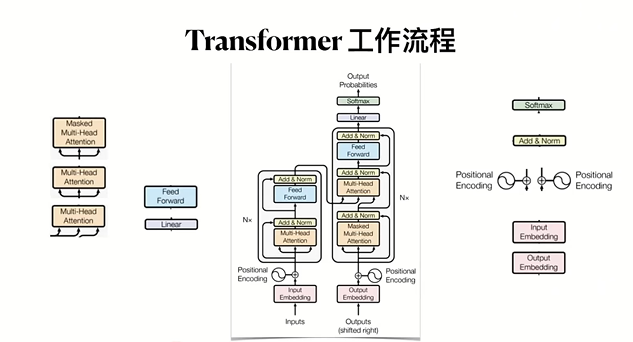

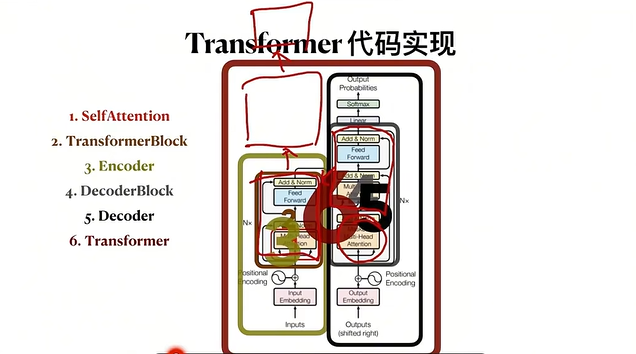